In [1]:
from pathlib import Path
from IPython.display import Image

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from nguyenpanda.swan import Color
from sklearn.model_selection import train_test_split

In [2]:
def show_image(img, _label=None):
    plt.figure(figsize=(2, 2))
    if _label is not None:
        plt.title(f'Label {_label}')
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.show()

# Table of content

<!-- TOC -->
* [Table of content](#table-of-content)
* [0. Import core packages](#0-import-core-packages)
* [1. Read MNIST dataset](#1-read-mnist-dataset)
* [2. Split and Normalize dataset](#2-split-and-normalize-dataset)
* [3. Define model's architecture and fit dataset](#3-define-models-architecture-and-fit-dataset)
* [4. Train model](#4-train-model)
  * [4.1. Train the model](#41-train-the-model)
  * [4.2. Continue training model with previous parameters](#42-continue-training-model-with-previous-parameters)
* [5. Save parameters](#5-save-parameters)
* [6. Load parameters](#6-load-parameters)
* [7. Predict and Add labels onto images](#7-predict-and-add-labels-onto-images)
<!-- TOC -->

# 0. Import core packages

In [3]:
from florentino.nn import *
from demo.utility import root_project

# 1. Read MNIST dataset
- We use 60.000 images for training (20% for evaluating) and 10.000 images for testing
- You can download it from https://www.kaggle.com/datasets/oddrationale/mnist-in-csv

In [4]:
DATASET: Path = root_project(cd_to='datasets/MNIST')

print(f'Current working directory: {Color["g"] + str(Path.cwd()) + Color.reset}')
print(f'Dataset directory: {Color["g"] + str(DATASET) + Color.reset}')

Current working directory: /Users/hatuongnguyen/NguyenLibrary/florentino/demo/mnist
Dataset directory: /Users/hatuongnguyen/NguyenLibrary/florentino/datasets/MNIST


In [5]:
try:
    df_train: pd.DataFrame = pd.read_csv(DATASET / 'train.csv', header=0)
    df_test: pd.DataFrame = pd.read_csv(DATASET / 'test.csv', header=0)
    df_train, df_eval = train_test_split(df_train, test_size=0.2, random_state=42)
except FileNotFoundError as e:
    print('''Make sure to download the `MNIST.zip` from https://github.com/nguyenpanda/florentino/datasets and unzip it!''')

# 2. Split and Normalize dataset

In [6]:
#@formatter:off
Y_train, X_train    = np.split(df_train.to_numpy(dtype=int), [1], axis=1)
Y_eval, X_eval      = np.split(df_eval.to_numpy(dtype=int), [1], axis=1)
Y_test, X_test      = np.split(df_test.to_numpy(dtype=int), [1], axis=1)

Y_train, X_train    = Y_train.T, X_train.T / 255.0
Y_eval, X_eval      = Y_eval.T, X_eval.T / 255.0
Y_test, X_test      = Y_test.T, X_test.T / 255.0
#@formatter:off

print(f'X_train shape {Color["g"] + str(X_train.shape) + Color.reset}')
print(f'Y_train shape {Color["g"] + str(Y_train.shape) + Color.reset}')

print(f'X_eval shape  {Color["g"] + str(X_eval.shape) + Color.reset}')
print(f'Y_eval shape  {Color["g"] + str(Y_eval.shape) + Color.reset}')

print(f'X_test shape  {Color["g"] + str(X_test.shape) + Color.reset}')
print(f'Y_test shape  {Color["g"] + str(Y_test.shape) + Color.reset}')

X_train shape (784, 48000)
Y_train shape (1, 48000)
X_eval shape  (784, 12000)
Y_eval shape  (1, 12000)
X_test shape  (784, 10000)
Y_test shape  (1, 10000)


# 3. Define model's architecture and fit dataset

In [7]:
model = Network([
    Dense(50, 784, activation='relu'),
    Dense(50, 50, activation='relu'),
    Softmax(10, 50)
], CrossEntropy())
model.fit(X_train, Y_train)
model.summary()

|  idx |                             Layer                              |   Parameters |
|    0 |                                                InputLayer(784) |            0 |
|    1 |                                 Dense(nodes=50, activate=relu) |        39250 |
|    2 |                                 Dense(nodes=50, activate=relu) |         2550 |
|    3 |                                              Softmax(nodes=10) |          510 |
|    4 |                                                OutputLayer(10) |            0 |
|      |                                                              5 |        42310 |
|              Loss function: CrossEntropy ||             Network type: classification |


# 4. Train model

## 4.1. Train the model

In [8]:
model.train(epochs=12, alpha=0.03, batches=100, validation_data=(X_eval, Y_eval))

------------------------------------------------------------------------------------
| epochs = 12               | batches = 100              | alpha = 0.03            |
------------------------------------------------------------------------------------
| x_train.shape = (784, 48000)             | y_train.shape = (10, 48000)           |
------------------------------------------------------------------------------------
| x_val.shape   = (784, 12000)             | y_val.shape   = (1, 12000)            |
------------------------------------------------------------------------------------
 1/12 epoch: [====================>] 100/100 | accuracy=0.67756 | val_accuracy=0.67858 
 2/12 epoch: [====================>] 100/100 | accuracy=0.75894 | val_accuracy=0.76267 
 3/12 epoch: [====================>] 100/100 | accuracy=0.79598 | val_accuracy=0.79750 
 4/12 epoch: [====================>] 100/100 | accuracy=0.81829 | val_accuracy=0.82183 
 5/12 epoch: [====================>] 100/100 | accura

## 4.2. Continue training model with previous parameters

In [9]:
model.train(epochs=10, alpha=0.01, batches=100, validation_data=(X_eval, Y_eval))

------------------------------------------------------------------------------------
| epochs = 10               | batches = 100              | alpha = 0.01            |
------------------------------------------------------------------------------------
| x_train.shape = (784, 48000)             | y_train.shape = (10, 48000)           |
------------------------------------------------------------------------------------
| x_val.shape   = (784, 12000)             | y_val.shape   = (1, 12000)            |
------------------------------------------------------------------------------------
 1/10 epoch: [====================>] 100/100 | accuracy=0.88596 | val_accuracy=0.88575 
 2/10 epoch: [====================>] 100/100 | accuracy=0.88710 | val_accuracy=0.88667 
 3/10 epoch: [====================>] 100/100 | accuracy=0.88848 | val_accuracy=0.88783 
 4/10 epoch: [====================>] 100/100 | accuracy=0.88985 | val_accuracy=0.88892 
 5/10 epoch: [====================>] 100/100 | accura

# 5. Save parameters

In [10]:
PARA_DIRECTORY = 'd50_d50_s10_CE'
model.save(f'parameters/{PARA_DIRECTORY}')

# 6. Load parameters

|  idx |                             Layer                              |   Parameters |
|    0 |                                                InputLayer(784) |            0 |
|    1 |                                 Dense(nodes=50, activate=relu) |        39250 |
|    2 |                                 Dense(nodes=50, activate=relu) |         2550 |
|    3 |                                              Softmax(nodes=10) |          510 |
|    4 |                                                OutputLayer(10) |            0 |
|      |                                                              5 |        42310 |
|              Loss function: CrossEntropy ||             Network type: classification |


Accuracy of X_eval:  0.8978
Prediction:  [7 6]


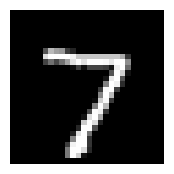

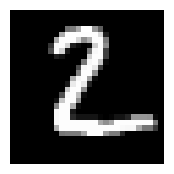

In [11]:
model_load = Network.load(f'parameters/{PARA_DIRECTORY}', CrossEntropy())
model_load.summary()
print('\n')
print(f'Accuracy of X_eval: ', model_load.accuracy(X_test, Y_test))

y_pre = model_load.predict(X_test[:, 0:2])
print('Prediction: ', np.argmax(y_pre, axis=0))
for i in range(2):
    show_image(X_test[:, i].reshape(28, 28))

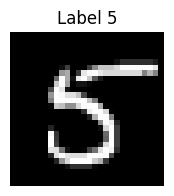

In [12]:
idx = 0
y_estimate = model.predict(X_train)
label = np.argmax(y_estimate, axis=0)
show_image(X_train[:, idx].reshape(28, 28), label[idx])

# 7. Predict and Add labels onto images

In [17]:
def show_result(x: np.ndarray, y_true: np.ndarray, row=1, col=1, img: Path | str = None):
    digit_array = np.array([
        np.array([0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0], dtype=np.float64),  # 0
        np.array([0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0], dtype=np.float64),  # 1
        np.array([0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1], dtype=np.float64),  # 2
        np.array([0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0], dtype=np.float64),  # 3
        np.array([0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0], dtype=np.float64),  # 4
        np.array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0], dtype=np.float64),  # 5
        np.array([0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0], dtype=np.float64),  # 6
        np.array([1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0], dtype=np.float64),  # 7
        np.array([0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0], dtype=np.float64),  # 8
        np.array([0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0], dtype=np.float64),  # 9
    ])
    digit_array = digit_array.reshape((10, 5, 5))

    _y_estimate = model.predict(x)
    _label = np.argmax(_y_estimate, axis=0)

    X_img = x.copy().reshape((28, 28, -1))
    Y_img: np.ndarray = np.transpose(digit_array[_label], axes=[1, 0, 2])
    Y_img: np.ndarray = np.transpose(Y_img, axes=[0, 2, 1])
    
    Y_true: np.ndarray = np.transpose(digit_array[y_true.flatten()], axes=[1, 0, 2])
    Y_true: np.ndarray = np.transpose(Y_true, axes=[0, 2, 1])

    X_img[:5, :5, ...] = Y_img
    X_img[-5:, -5:, ...] = Y_true
    X_img = np.pad(X_img, ((1, 1), (1, 1), (0, 0)), mode='constant', constant_values=0.5)

    _idx = np.arange(0, X_img.shape[-1]).reshape((row, col))
    w, h = X_img.shape[:2]

    MER_IMG = np.transpose(X_img[..., _idx], axes=[2, 0, 3, 1]).reshape(row * w, col * h)

    img = Path(img).resolve()
    
    img = img.with_suffix('.png')
    img.parent.mkdir(exist_ok=True)
    
    plt.axis('off')
    plt.imsave(img, MER_IMG, cmap='gray')
    plt.imshow(MER_IMG, cmap='gray')
    plt.show()
    
    print('Image have been downloaded to: ', '\033[1;92m', img.absolute(), '\033[0m', sep='')

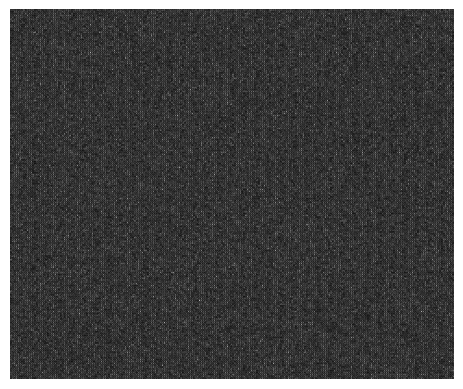

Image have been downloaded to: /Users/hatuongnguyen/NguyenLibrary/florentino/demo/mnist/images/train.png


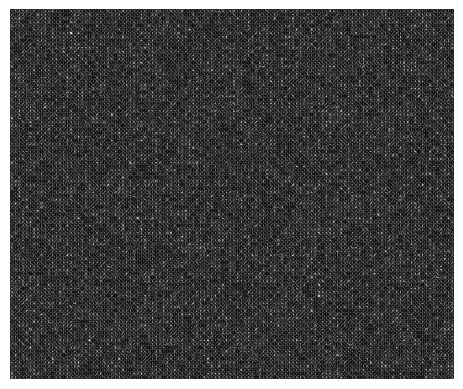

Image have been downloaded to: /Users/hatuongnguyen/NguyenLibrary/florentino/demo/mnist/images/eval.png


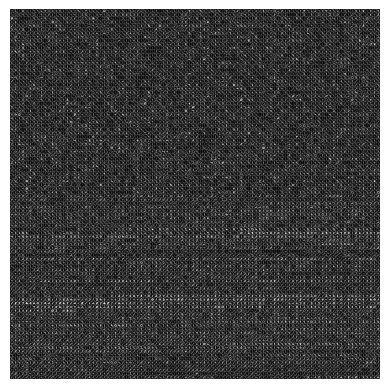

Image have been downloaded to: /Users/hatuongnguyen/NguyenLibrary/florentino/demo/mnist/images/test.png


In [18]:
try:
    show_result(X_train, Y_train, row=200, col=240, img='images/train.png')
    show_result(X_eval, Y_eval, row=100, col=120, img='images/eval.png')
    show_result(X_test, Y_test, row=100, col=100, img='images/test.png')
except ValueError as e:
    print('''\033[1;91mMake sure train, eval, test dataset following this shape
    X_train shape (784, 48000)
    Y_train shape (1, 48000)
    X_eval shape  (784, 12000)
    Y_eval shape  (1, 12000)
    X_test shape  (784, 10000)
    Y_test shape  (1, 10000)
    
    Or change the `row` and `col` keyword arguments at `show_result` to match your dataset\033[0m''')